***
## Import Packages

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# import other packages if you need any
%matplotlib inline

<a id='Section 1'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 1. 

<font size="3"> Given the images in folder Problem1, write a function to process these images in order to isolate the green complete circles. A complete circle is a circle that does not touch/overlap with other circles and does not have holes. The function should ouput a new color image with the complete green circles only. Also, the function should print the total number of found green circles and the number of green circles with holes.  </font> 
 
<font size="3"> Test your function for each image in a separate cell. </font> 

<font size="3"> <strong>Note:</strong> Don't use Hough transform to find the circles. </font> 


<font size="2"> <strong>Note:</strong> Problem provided by Prof Iyad Jaafer. </font> 
***

In [16]:
# function 
def findGreenCircles(img):
    imgg=img[:,:,1]
    imgg[imgg<200]=0
    imgg[imgg>200]=255
    
    contours, hierarchy = cv2.findContours(imgg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    cont=np.zeros(img.shape)
    noholes=[]
    greenwithholes=0
    greennoholes=0
    totalgreens=0
    for c in contours:
       a = cv2.contourArea(c)
       if a>1100:
          totalgreens=totalgreens+1
          if a>2000:
               totalgreens=totalgreens+1

          
    for hh in hierarchy:
      for i in range(0,len(hh)):
        if hh[i][2]==-1 and hh[i][3]==-1 :
            P = int(cv2.arcLength(contours[i],True))
            Area = cv2.contourArea(contours[i])
            C =  P**2 / (Area)
            Circ = 4*np.pi*Area/P**2
            
            if Circ>=0.87:
                 noholes.append(contours[i])
                 greennoholes=greennoholes+1
        if hh[i][3]!=-1:
           greenwithholes=greenwithholes+1

    cv2.drawContours(cont,noholes,-1,(1,1,1),cv2.FILLED)
    imgag=img * cont
    
    plt.figure(figsize=(15,15))

    plt.subplot(121)
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(122)
    plt.imshow(imgag.astype("int64"))
    plt.axis("off")
    
   
    plt.show()
    print("Number of green circles:",totalgreens)
    print("Number of green circles with holes:",greenwithholes)

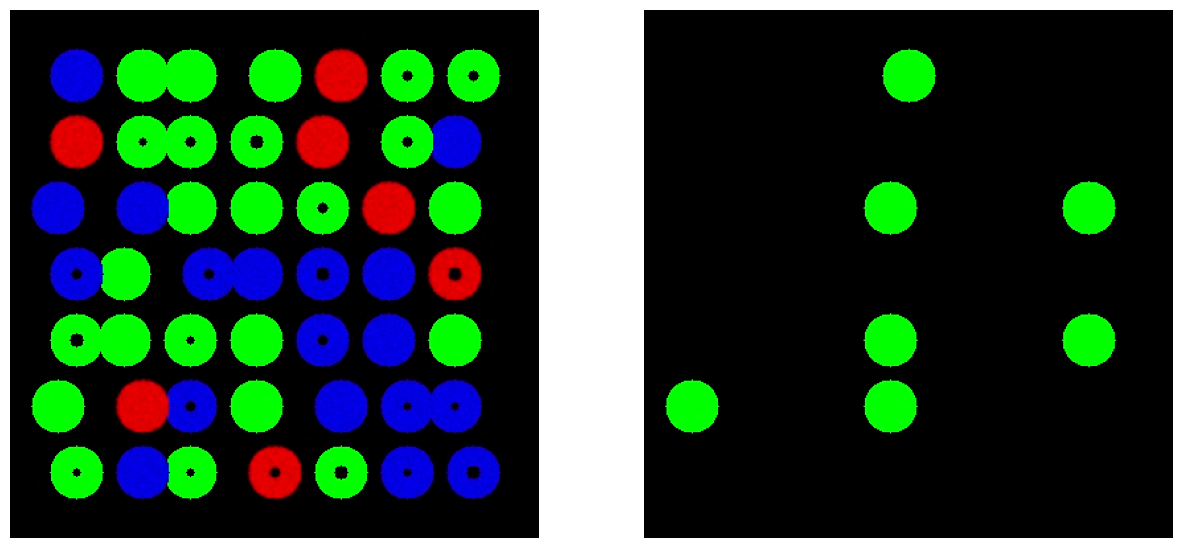

Number of green circles: 24
Number of green circles with holes: 12


In [17]:
# Test image1
img=cv2.imread('Problem1/imag1.jpg')
imgg=findGreenCircles(img)


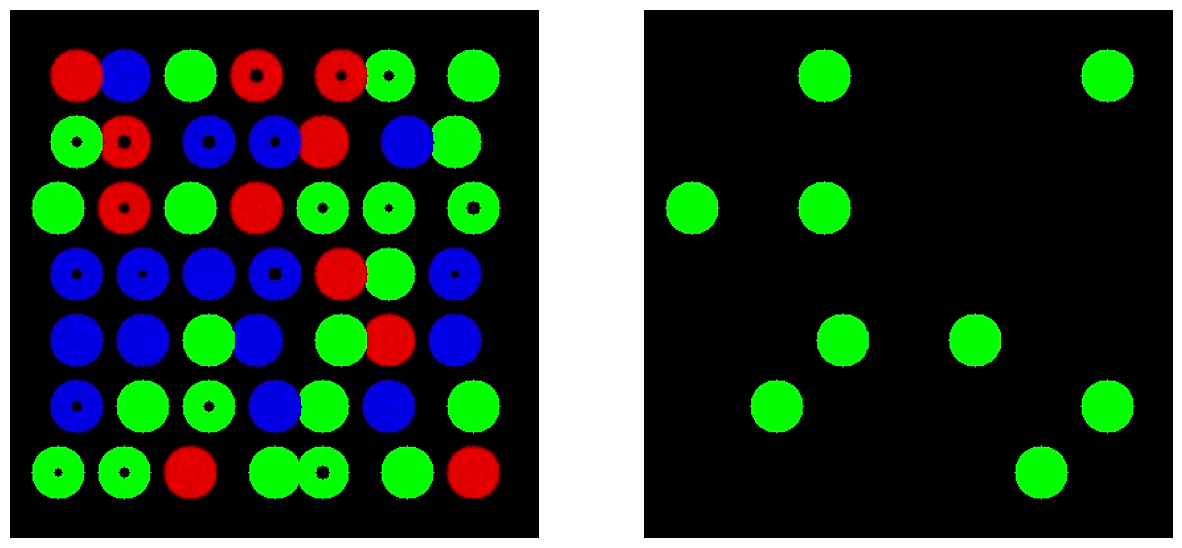

Number of green circles: 22
Number of green circles with holes: 9


In [18]:
# Test image2
img=cv2.imread('Problem1/imag2.jpg')
findGreenCircles(img)


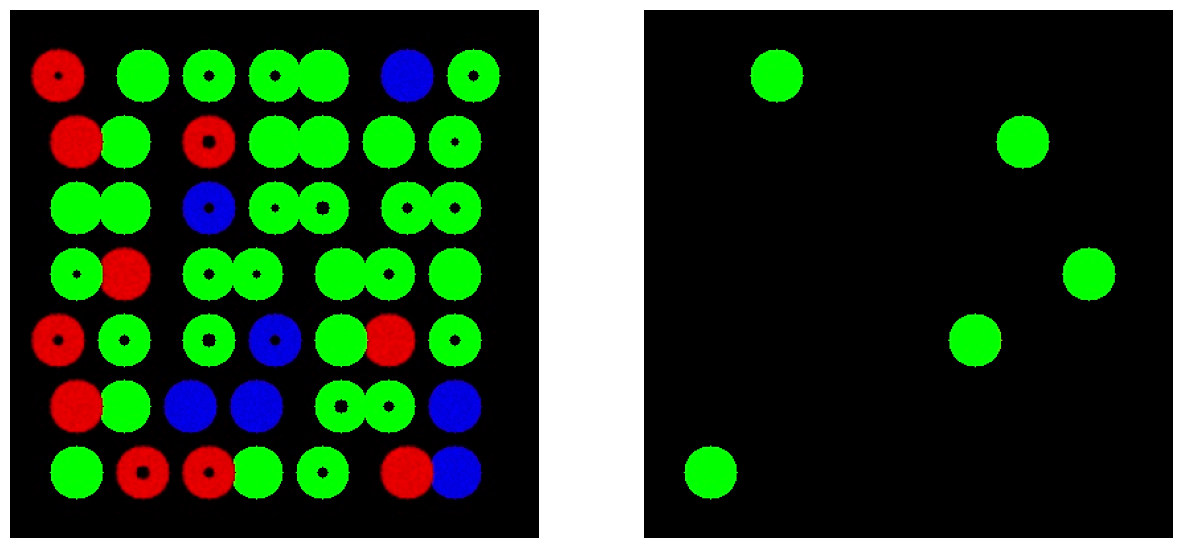

Number of green circles: 32
Number of green circles with holes: 18


In [19]:
# Test image3
img=cv2.imread('Problem1/imag3.jpg')
findGreenCircles(img)